# Notebook 04: Exploratory Data Analysis (EDA)

In [ ]:
This notebook explores patterns and relationships in the TED Talk dataset to support feature selection for modeling.

We will analyze:
- How linguistic features relate to engagement (`views`)
- Differences in structure and readability across tags and events
- Correlation between text-based metrics and audience impact

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
df = pd.read_csv("../data/preprocessed_data.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (4095, 22)


,key_column,speaker_occupation,speaker,transcript,event,description,title,recorded_date,views,duration,...,completeness_score,transcript_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,lexical_diversity,flesch_reading_ease,flesch_kincaid_grade
0,https://www.ted.com/talks/maira_kalman_the_ill...,"Illustrator, author",Maira Kalman,What I am always thinking about is what this s...,TED2007,Author and illustrator Maira Kalman talks abou...,The illustrated woman,2007-03-03,815011,1050,...,100.0,what i am always thinking about is what this s...,3270,16312,193,3.988685,16.943005,0.262997,76.487905,6.693663
1,https://www.ted.com/talks/virginia_postrel_on_...,Journalist,Virginia Postrel,You might be wondering why I'm wearing sunglas...,TED2004,"In a timely talk, cultural critic Virginia Pos...",On glamour,2004-02-02,424070,975,...,100.0,you might be wondering why im wearing sunglass...,2806,15288,176,4.448681,15.943182,0.282609,67.596809,7.445621
2,https://www.ted.com/talks/robert_wright_the_ev...,"Journalist, philosopher",Robert Wright,I'm going to talk about compassion and the gol...,TEDSalon 2009 Compassion,Robert Wright uses evolutionary biology and ga...,The evolution of compassion,2009-10-14,298774,1016,...,100.0,im going to talk about compassion and the gold...,2753,15155,128,4.505267,21.507812,0.250636,60.881695,9.272160
3,https://www.ted.com/talks/dennis_vanengelsdorp...,Bee expert,Dennis vanEngelsdorp,"What I'd like you to do is, just really quickl...",Taste3 2008,Bees are dying in droves. Why? Leading apiaris...,A plea for bees,2008-07-19,765570,988,...,100.0,what id like you to do is just really quickly ...,2925,15327,141,4.240342,20.744681,0.265299,70.769594,8.022526
4,https://www.ted.com/talks/barry_schuler_genomi...,Entrepreneur,Barry Schuler,"What's happening in genomics, and how this rev...",Taste3 2008,What is genomics? How will it affect our lives...,Genomics 101,2008-06-30,458222,1286,...,100.0,whats happening in genomics and how this revol...,3294,17523,165,4.319369,19.963636,0.251973,69.286694,7.711309


## Correlation with Engagement (Views)

We compute and visualize correlations between content-related features and the number of views per talk.

This helps identify:
- Which linguistic features may predict audience interest
- Which variables may be useful for modeling engagement


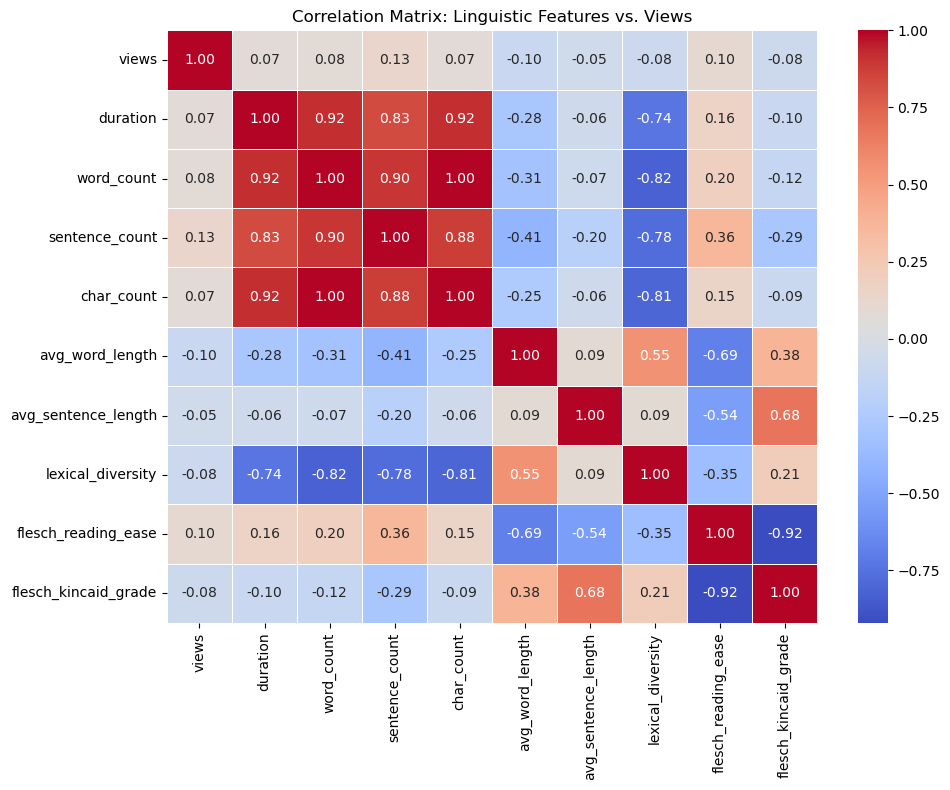

In [8]:
# Select numeric features relevant to engagement
features = [
    "views", "duration", "word_count", "sentence_count", "char_count",
    "avg_word_length", "avg_sentence_length", "lexical_diversity",
    "flesch_reading_ease", "flesch_kincaid_grade"
]

# Compute correlation matrix
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Linguistic Features vs. Views")
plt.tight_layout()
plt.savefig("../plots/feature_correlation_views.png")
plt.show()


### Correlation Insights: Linguistic Features vs. Views

- **Weak correlations with views overall**: No single feature strongly predicts popularity, which is expected given external factors (e.g., speaker fame, promotion).

- **Slight positive signals**:
  - `sentence_count` shows a weak positive correlation with `views` (0.13)
  - `flesch_reading_ease` correlates positively with `views` (0.10), suggesting more readable talks perform slightly better

- **Negative correlations**:
  - `avg_word_length` and `lexical_diversity` are weakly **negatively** correlated with `views`, hinting that overly complex or verbose talks might underperform

- **Feature redundancy detected**:
  - `word_count`, `char_count`, and `duration` are extremely correlated (>0.90) — only one is likely needed for modeling
  - `flesch_reading_ease` and `flesch_kincaid_grade` are strongly inversely related (−0.92), as expected

These insights help prioritize features and reduce multicollinearity in the upcoming modeling notebook.


## Feature Relationships with Views

We now visualize how selected structural and linguistic features relate to audience engagement (`views`). Scatter plots can reveal non-obvious patterns not captured by correlation alone.


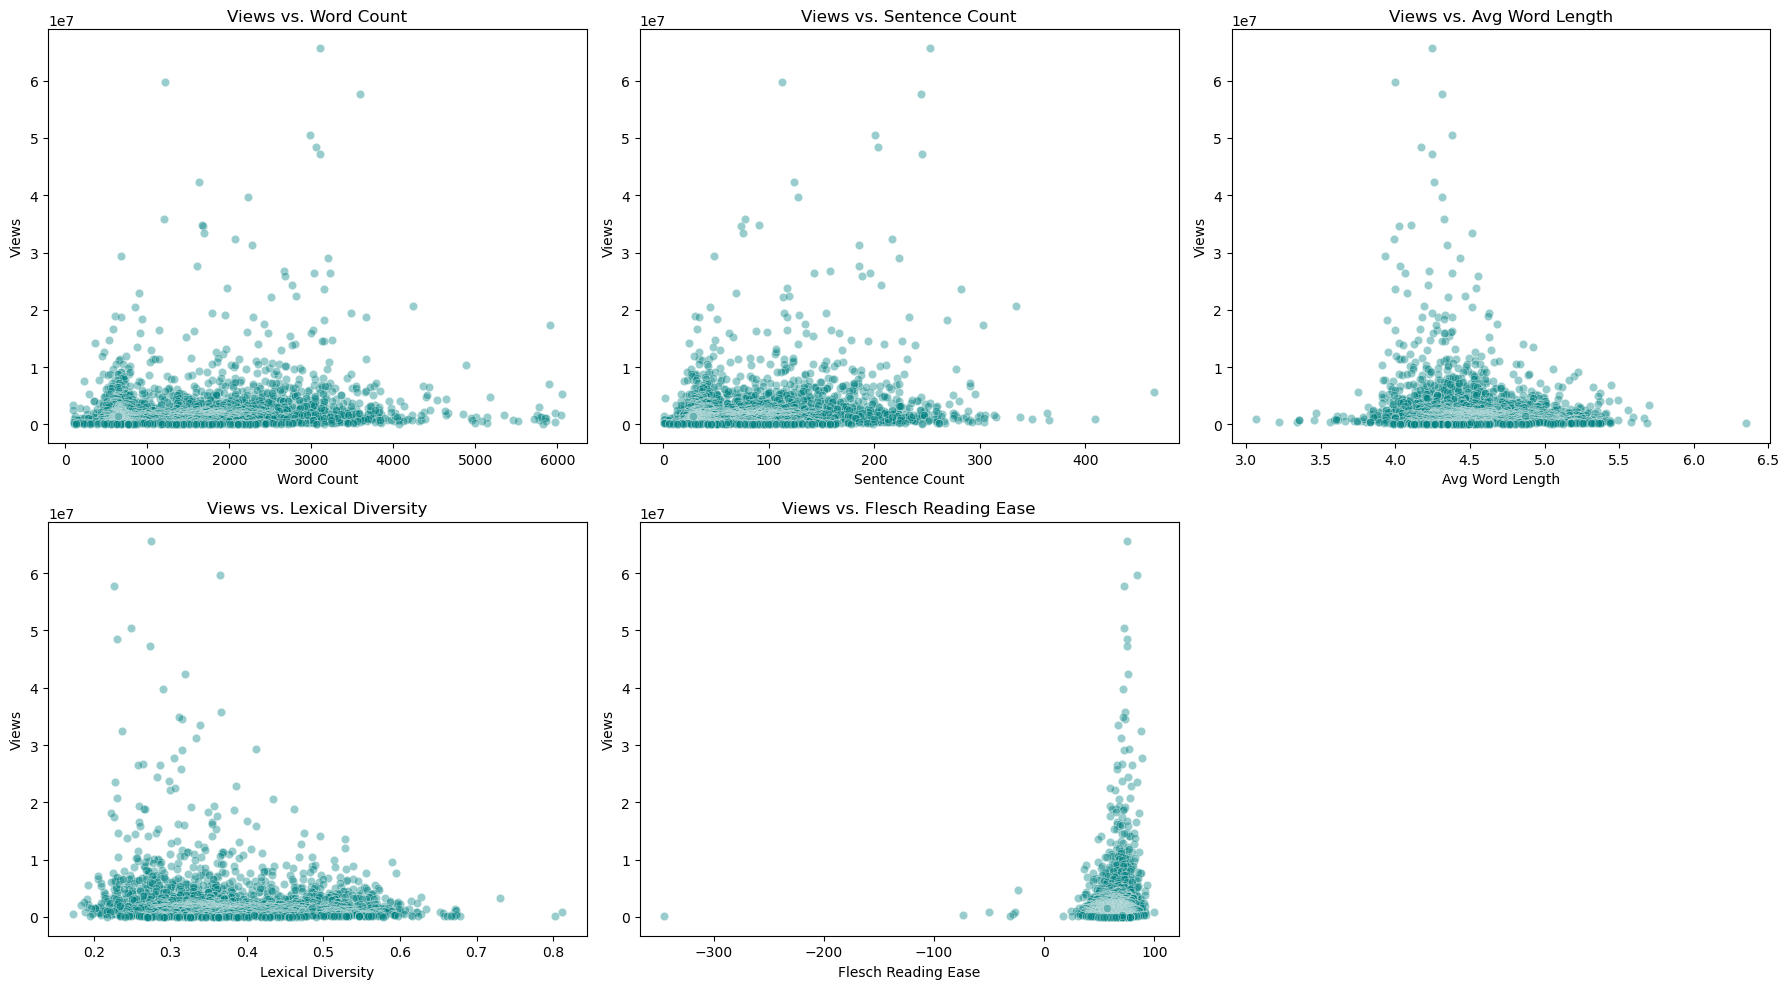

In [12]:
features_to_plot = ["word_count", "sentence_count", "avg_word_length", "lexical_diversity", "flesch_reading_ease"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=feature, y="views", alpha=0.4, ax=axes[i], color="teal")
    axes[i].set_title(f"Views vs. {feature.replace('_', ' ').title()}")
    axes[i].set_ylabel("Views")
    axes[i].set_xlabel(feature.replace("_", " ").title())

# Remove extra axis if needed
if len(features_to_plot) < len(axes):
    for i in range(len(features_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("../plots/views_vs_features_scatterplots.png")
plt.show()


### Engagement Patterns Across Linguistic Features

These scatterplots show the relationship between `views` and selected linguistic features. While no single variable strongly predicts popularity, a few patterns emerge:

- **Word Count & Sentence Count vs. Views**  
  - Most popular talks range between 800–2,500 words and ~50–150 sentences  
  - Very long or short talks tend not to perform as well  
  - A dense cluster of moderately long talks earns the majority of views

- **Average Word Length**  
  - Talks with an average word length of ~4.3–4.7 dominate higher view ranges  
  - Overly complex vocabulary (5+ chars/word) appears to reduce accessibility and engagement

- **Lexical Diversity**  
  - Talks with moderate diversity (~0.3–0.45) perform slightly better  
  - Extremely high diversity may confuse audiences, while low diversity may feel repetitive

- **Flesch Reading Ease**  
  - Talks with a readability score of 60–80 (easily understandable) tend to receive more views  
  - Highly complex talks (FRE < 30) receive notably fewer views

**Takeaway:** Popular TED Talks strike a balance — they are not overly simplistic, but they avoid extreme complexity in vocabulary and sentence structure. These patterns will guide future modeling and feedback strategies in SpeakScape.


## Linguistic Differences by Tag

We explore how word count, sentence complexity, and readability vary across the top 10 most frequent tags. This reveals content patterns across talk categories (e.g., technology, education, science).


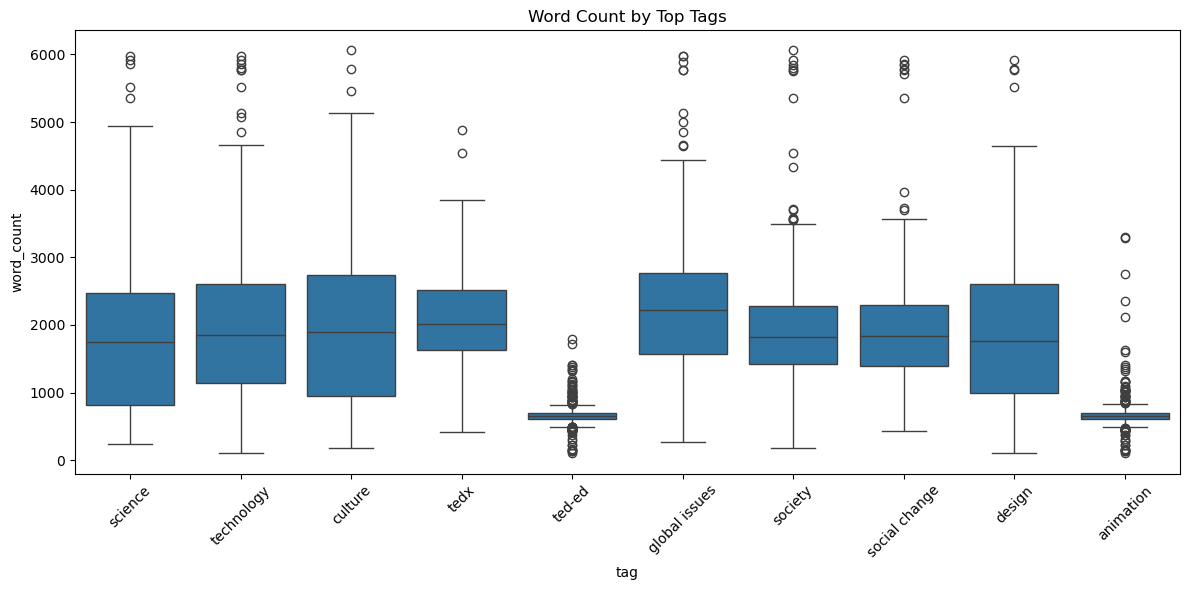

In [16]:
# Extract most common individual tags
from collections import Counter
from ast import literal_eval

# Flatten all tags into a single list
all_tags = df["tags"].apply(literal_eval).explode()
top_tags = Counter(all_tags).most_common(10)
top_tags = [tag for tag, _ in top_tags]

# Create binary tag presence column for each of the top tags
for tag in top_tags:
    df[f"tag_{tag}"] = df["tags"].apply(lambda t: tag in literal_eval(t))

# Melt for plotting
melted = df.melt(
    id_vars=["word_count", "avg_sentence_length", "flesch_reading_ease"],
    value_vars=[f"tag_{t}" for t in top_tags],
    var_name="tag",
    value_name="present"
)

melted["tag"] = melted["tag"].str.replace("tag_", "")

# Filter to rows where tag is present
tag_data = melted[melted["present"] == True]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=tag_data, x="tag", y="word_count")
plt.xticks(rotation=45)
plt.title("Word Count by Top Tags")
plt.tight_layout()
plt.savefig("../plots/wordcount_by_top_tags.png")
plt.show()


### Word Count Variation Across Top Tags

- **Science**, **Technology**, and **Culture** talks tend to be longer, with medians around 1,800–2,000 words and a wider spread
- **TED-Ed** and **Animation** have consistently short talks (many under 1,000 words), reflecting their visual and educational brevity
- **Global Issues** and **Social Change** show both high medians and outliers — these talks often involve storytelling or advocacy
- **Tech**-adjacent categories like **Design** and **Society** maintain moderate-to-long lengths but with tighter IQRs

These distinctions suggest that **tag context influences structural expectations**, which can guide personalized feedback or model stratification in downstream tasks.


### Word Count by Event (Top 10)

We examine how presentation length varies across the most common TED event labels.


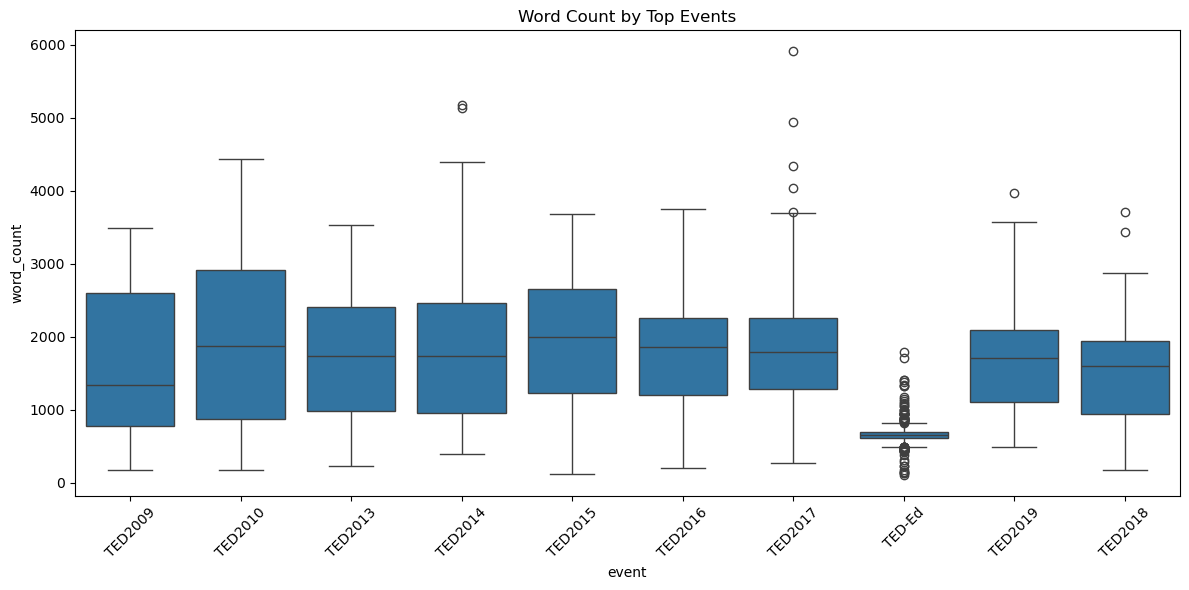

In [20]:
# Top 10 most common events
top_events = df["event"].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["event"].isin(top_events)], x="event", y="word_count")
plt.xticks(rotation=45)
plt.title("Word Count by Top Events")
plt.tight_layout()
plt.savefig("../plots/wordcount_by_event_boxplot.png")
plt.show()


### Word Count Variation Across TED Events

- Most TED events (e.g., TED2010–2019) show consistent talk lengths:
  - Median word count ranges from ~1,500 to 2,000 words
  - Similar upper and lower quartiles, indicating structural consistency over time

- **TED-Ed** stands out:
  - Significantly shorter talks (often under 1,000 words)
  - Very tight IQR — highly structured, educational in nature
  - This matches the pattern seen in tag-based analysis earlier

- Some events (e.g., TED2010) include longer talks with wider variability and more outliers

These structural differences help guide context-aware benchmarking and user feedback in the Streamlit app.


### Average Readability by Event (Top 10)

This barplot shows how linguistically accessible talks are across the most frequent TED events.


/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_402/3914549572.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_readability.index, y=mean_readability.values, palette="Blues_d")


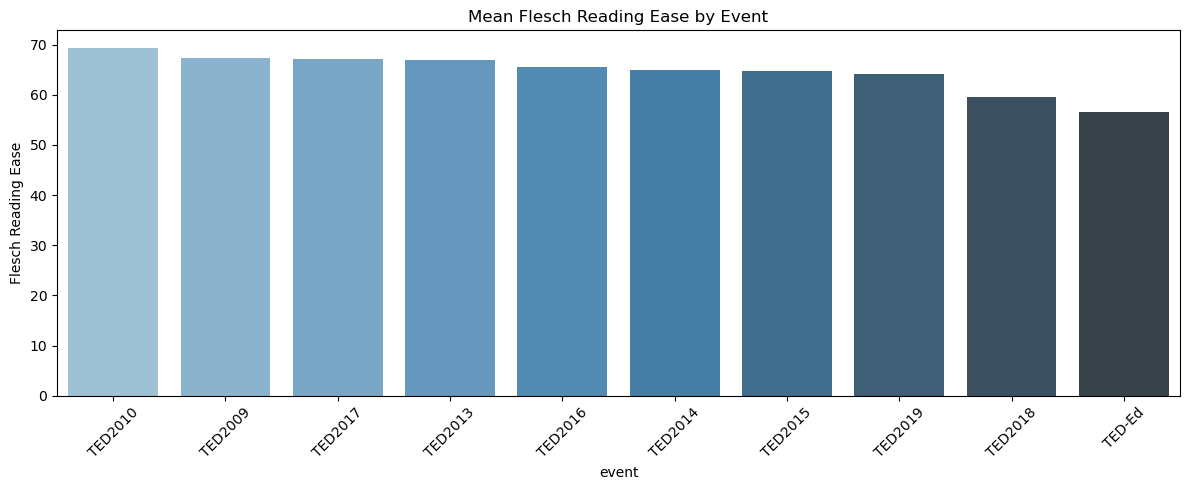

In [23]:
# Mean readability for top events
mean_readability = df[df["event"].isin(top_events)].groupby("event")["flesch_reading_ease"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=mean_readability.index, y=mean_readability.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Mean Flesch Reading Ease by Event")
plt.ylabel("Flesch Reading Ease")
plt.tight_layout()
plt.savefig("../plots/readability_by_event_barplot.png")
plt.show()


### Readability Trends Across TED Events

- **TED2010** and **TED2009** featured the most readable talks on average (Flesch scores near 70)
- **TED2017–2014** maintained a consistently readable range (65–68), indicating ongoing editorial alignment
- **TED-Ed**, while shorter in length, had **lower readability** (~57):
  - Suggests denser or jargon-heavy content (e.g., STEM-focused, animated educational formats)
  - May be optimized for visual aid rather than verbal simplicity

Overall, TED Talks tend to maintain a general reading ease score of 60–70, aligning with an accessible, general audience tone. Events with more technical or educational focus may skew more complex.


#### Export EDA-Enhanced Dataset

In [28]:
df.to_csv("../data/eda_features.csv", index=False)
print("EDA-enhanced dataset saved to: ../data/eda_features.csv")


EDA-enhanced dataset saved to: ../data/eda_features.csv


In [31]:
from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="04_exploratory_data_analysis",
    summary={
        "description": "Performed exploratory data analysis on TED talks dataset. Analyzed relationships between linguistic features and views. Compared structural and readability features across tags and events.",
        "records_analyzed": int(df.shape[0]),
        "features_analyzed": [
            "word_count", "sentence_count", "avg_word_length",
            "avg_sentence_length", "lexical_diversity",
            "flesch_reading_ease", "flesch_kincaid_grade"
        ],
        "comparisons_done": [
            "views vs features (scatterplots)",
            "word count by tag and event (boxplots)",
            "readability by event (barplot)"
        ],
        "output_file": "../data/eda_features.csv",
        "plots_generated": [
            "../plots/feature_correlation_views.png",
            "../plots/views_vs_features_scatterplots.png",
            "../plots/wordcount_by_top_tags.png",
            "../plots/wordcount_by_event_boxplot.png",
            "../plots/readability_by_event_barplot.png"
        ]
    }
)

<IPython.core.display.Javascript object>

Notebook save triggered.
Summary saved to: ../reports/04_exploratory_data_analysis_summary_2025-05-26_04-57-03.json


## Notebook Summary

This EDA notebook explored structural, linguistic, and readability features in TED Talks and their relationship to audience engagement. Key patterns:

- Moderately long, readable talks tend to perform best
- Complexity (e.g., word length, diversity) can hurt accessibility and engagement
- Talk structure varies by content tag and event format (e.g., TED-Ed vs. TEDMain)

These findings support informed feature selection and personalized feedback strategies in the next modeling and application notebooks.


----------------------